In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import zipfile
with zipfile.ZipFile('/content/drive/MyDrive/raw.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/drive/MyDrive')

In [4]:
!pip install underthesea

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 20.9/20.9 MB 88.9 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 657.8/657.8 kB 45.7 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1.3/1.3 MB 68.6 MB/s eta 0:00:00


In [5]:
!pip install deep-translator

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 42.3/42.3 kB 2.8 MB/s eta 0:00:00


In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.utils import resample
import underthesea
from underthesea import word_tokenize
import re
from deep_translator import GoogleTranslator
import time
from concurrent.futures import ThreadPoolExecutor


# **A. Exploratory Data Analysis**

## **I. Load Datasets**

In [7]:
train_set = pd.read_csv("/content/drive/MyDrive/raw/train.csv")
dev_set = pd.read_csv("/content/drive/MyDrive/raw/dev.csv")
test_set = pd.read_csv("/content/drive/MyDrive/raw/test.csv")

In [8]:
train_set

free_text  label_id
0      Em ƒë∆∞·ª£c l√†m fan c·ª©ng lu√¥n r·ªìi n√® ‚ù§Ô∏è reaction q...         0
1      ƒê√∫ng l√† b·ªçn m·∫Øt h√≠p l√≤ xo th·ª•t :))) b√™n vi·ªát n...         2
2               ƒê·∫≠u VƒÉn C∆∞·ªùng gi·ªù gi·ªëng th·∫±ng sida h∆°n √†         0
3      C√îN ƒê·ªí C·ª§C S√öC V√î NH√ÇN T√çNH ƒê·ªÄ NGHI VN. NH√Ä N∆Ø...         2
4      T·ª´ l√Ω thuy·∫øt ƒë·∫øn th·ª±c h√†nh l√† c·∫£ 1 c√¢u chuy·ªán ...         0
...                                                  ...       ...
24043                  Th·∫£ tim cho s·ª± c·ªëng hi·∫øn c·ªßa ng√†i         0
24044                                             Thua !         0
24045  ·ªû Vi·ªát Nam th√¨ c√≥ kh√°nh sky..h·∫£i ngo·∫°i c√≥ tr·∫ßn...         0
24046    1:22 ai l·ªõp du chu c·ªù moo, Duy√™n d√°ng qu√° c√¥ ∆°i         0
24047  C·ª• n√†y m·∫Øt m·ªõi c·∫Øt m√Ω sao ta kkk ƒë·∫•y vnch ƒë·∫•y ...         0

[24048 rows x 2 columns]

In [9]:
dev_set

free_text  label_id
0                                          Coi c∆∞·ªùi x·ªâu         0
1                       Chi ba vang ngoc dep va tre mai         0
2     Ch·∫ßn v·∫ßn m·ªôt ƒë·ªëng, kh√¥ng ai ƒëo√°n tr∆∞·ªõc ƒë∆∞·ª£c ƒë·ª´...         0
3                                 Du h·ªçc sinh √öc m√† l·∫°i         0
4     Dm b√°o l√° c·∫£i.. Nghƒ© g√¨ khi ·ªü qn m√† c√≥ h∆°n 30%...         0
...                                                 ...       ...
2667                    Th·∫≠t s·ª± l√† ƒë√£ hi sinh qu√° nhi·ªÅu         0
2668                                ch·∫≠t ch·ªôi v·∫≠y c∆° m√†         0
2669                          Ch·ªëng d·ªãch nh∆∞ ch·ªëng gi·∫∑c         0
2670  Bao nhi√™u ae ra ƒë·∫£o gi·ªù ch∆∞a v·ªÅ h√¥m b·ªØa theo 1...         0
2671  Dcm ƒÉn p·∫£i l·ªëp l√°i th√¨ gi·∫øt con nh√† ng ta ah c...         2

[2672 rows x 2 columns]

In [10]:
test_set

free_text  label_id
0                      ƒê·ª´ng c·ªë bi·ªán minh =)))) choi lon         0
1                       Haizz. Nthe n√†y th√¨ d√¢n kh·ªï qu√°         1
2     the nay ma chi phat gay roi trat tu cong cong ...         0
3                 Mua cho em h·ªôp bcs mƒ© s√†i cho oai :))         0
4                                          coin card :3         1
...                                                 ...       ...
6675                Nghe c≈©ng ƒë∆∞·ª£c. Nh∆∞ng v·∫´n c√†y views         0
6676  Pha team up cƒÉng c·ª±c ƒë·∫øn t·ª´ v·ªã tr√≠ √¥ng ch·ªß ƒë·∫ßm...         0
6677  Thanh Nh∆∞·ªùng sao m ƒë·ªçc ƒëc cmt c·ªßa t th·∫ø ti√™n s...         0
6678  ƒê√∫ng r·ªìi, nh√¨n c√≥ ria m√©p , v·ªõi m·∫∑t gi·ªëng ƒë√†n ...         0
6679  Ch∆∞a ch·∫Øc M·ªπ b·ªã nhi·ªÖm virus corona V≈© h√°n (c·ªßa...         0

[6680 rows x 2 columns]

## **II. Check Missing Value**

In [14]:
missing_values = train_set.isnull().sum()

print(f"Missing value in train set:\n{missing_values}")

missing_percentage = (missing_values / len(train_set)) * 100

missing_percentage

Missing value in train set:
free_text    2
label_id     0
dtype: int64


free_text    0.008317
label_id     0.000000
dtype: float64

In [18]:
train_set = train_set.dropna()
train_set.shape

(24046, 2)

In [16]:
missing_values = dev_set.isnull().sum()

print(f"Missing value in dev set:\n{missing_values}")

missing_percentage = (missing_values / len(dev_set)) * 100

missing_percentage

Missing value in dev set:
free_text    0
label_id     0
dtype: int64


free_text    0.0
label_id     0.0
dtype: float64

In [17]:
missing_values = test_set.isnull().sum()

print(f"Missing value in test set:\n{missing_values}")

missing_percentage = (missing_values / len(test_set)) * 100

missing_percentage

Missing value in test set:
free_text    0
label_id     0
dtype: int64


free_text    0.0
label_id     0.0
dtype: float64

## **III. Visualize Class Distribution**

In [21]:
print(f"Class Count in Train Set:\n{train_set['label_id'].value_counts()}")
print(f"\nClass Count in Test Set:\n{test_set['label_id'].value_counts()}")
print(f"\nClass Count in Dev Set:\n{dev_set['label_id'].value_counts()}")

Class Count in Train Set:
label_id
0    19885
2     2556
1     1605
Name: count, dtype: int64

Class Count in Test Set:
label_id
0    5548
2     688
1     444
Name: count, dtype: int64

Class Count in Dev Set:
label_id
0    2190
2     270
1     212
Name: count, dtype: int64


<ipython-input-24-0946881e8dcc>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['label_id'], ax=axes[idx], palette="coolwarm")
<ipython-input-24-0946881e8dcc>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['label_id'], ax=axes[idx], palette="coolwarm")
<ipython-input-24-0946881e8dcc>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['label_id'], ax=axes[idx], palette="coolwarm")


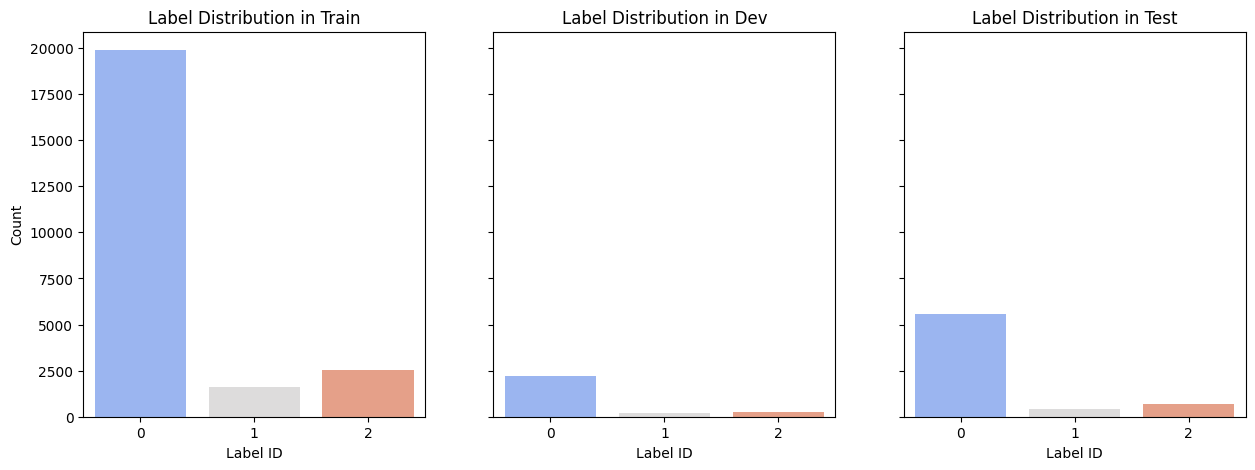

In [24]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

for idx, (df, title) in enumerate(zip([train_set, dev_set, test_set], ['Train', 'Dev', 'Test'])):
    sns.countplot(x=df['label_id'], ax=axes[idx], palette="coolwarm")
    axes[idx].set_title(f"Label Distribution in {title}")
    axes[idx].set_xlabel("Label ID")
    axes[idx].set_ylabel("Count")

plt.show()

## **IV. Handling Class Imbalance in Train Set**

### **1. Augment Data**

#### **1.1. Back Translate for Class 1&2**

In [25]:
abbreviation_dict = {
    "m": "m√†y",
    "t": "tao",
    "VN": "Vi·ªát Nam",
    "lol, loz": "l·ªìn",
    "vl": "v√£i l·ªìn",
    "dmm": "ƒë·ªãt m·∫π m√†y",
    "cc": "con c·∫∑c",
    "cl": "c√°i l·ªìn",
    "vc": "v√£i c·∫∑c",
    "dm": "ƒë·ªãt m·∫π",
    "vcl": "v√£i c·∫£ l·ªìn",
    "cmn": "con m·∫π n√≥",
    "mn": "m·ªçi ng∆∞·ªùi",
    "k, ko": "kh√¥ng",
    "cmt": "b√¨nh lu·∫≠n",
    "ak, ah": "√†",
    "j": "g√¨",
    "bh": "bao gi·ªù",
    "in4": "th√¥ng tin",
    "inb, ib": "nh·∫Øn tin",
    "dc, ƒëc": "ƒë∆∞·ª£c",
    "clg": "c√°i l·ªìn g√¨"
}

In [29]:
def expand_abbreviations(text):
    if not isinstance(text, str):
        return text

    for abbr, full_form in abbreviation_dict.items():
        text = re.sub(rf"\b{re.escape(abbr)}\b", full_form, text, flags=re.IGNORECASE)
    return text

In [31]:
train_set["expanded_text"] = train_set.apply(
    lambda row: expand_abbreviations(row["free_text"]) if row["label_id"] in [1, 2] else row["free_text"],axis=1
)

train_set

<ipython-input-31-dda6d5d7914f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_set["expanded_text"] = train_set.apply(


free_text  label_id  \
0      Em ƒë∆∞·ª£c l√†m fan c·ª©ng lu√¥n r·ªìi n√® ‚ù§Ô∏è reaction q...         0   
1      ƒê√∫ng l√† b·ªçn m·∫Øt h√≠p l√≤ xo th·ª•t :))) b√™n vi·ªát n...         2   
2               ƒê·∫≠u VƒÉn C∆∞·ªùng gi·ªù gi·ªëng th·∫±ng sida h∆°n √†         0   
3      C√îN ƒê·ªí C·ª§C S√öC V√î NH√ÇN T√çNH ƒê·ªÄ NGHI VN. NH√Ä N∆Ø...         2   
4      T·ª´ l√Ω thuy·∫øt ƒë·∫øn th·ª±c h√†nh l√† c·∫£ 1 c√¢u chuy·ªán ...         0   
...                                                  ...       ...   
24043                  Th·∫£ tim cho s·ª± c·ªëng hi·∫øn c·ªßa ng√†i         0   
24044                                             Thua !         0   
24045  ·ªû Vi·ªát Nam th√¨ c√≥ kh√°nh sky..h·∫£i ngo·∫°i c√≥ tr·∫ßn...         0   
24046    1:22 ai l·ªõp du chu c·ªù moo, Duy√™n d√°ng qu√° c√¥ ∆°i         0   
24047  C·ª• n√†y m·∫Øt m·ªõi c·∫Øt m√Ω sao ta kkk ƒë·∫•y vnch ƒë·∫•y ...         0   

                                           expanded_text  
0      Em ƒë∆∞·ª£c l√†m fan c·ª©ng lu√¥n r·ªìi n√® ‚ù§Ô∏è reaction q...  
1      ƒê√∫ng l√† b·ªçn m·∫Øt h√≠p l√≤ xo th·ª•t :))) b√™n vi·ªát n...  
2               ƒê·∫≠u VƒÉn C∆∞·ªùng gi·ªù gi·ªëng th·∫±ng sida h∆°n √†  
3      C√îN ƒê·ªí C·ª§C S√öC V√î NH√ÇN T√çNH ƒê·ªÄ NGHI Vi·ªát Nam. ...  
4      T·ª´ l√Ω thuy·∫øt ƒë·∫øn th·ª±c h√†nh l√† c·∫£ 1 c√¢u chuy·ªán ...  
...                                                  ...  
24043                  Th·∫£ tim cho s·ª± c·ªëng hi·∫øn c·ªßa ng√†i  
24044                                             Thua !  
24045  ·ªû Vi·ªát Nam th√¨ c√≥ kh√°nh sky..h·∫£i ngo·∫°i c√≥ tr·∫ßn...  
24046    1:22 ai l·ªõp du chu c·ªù moo, Duy√™n d√°ng qu√° c√¥ ∆°i  
24047  C·ª• n√†y m·∫Øt m·ªõi c·∫Øt m√Ω sao ta kkk ƒë·∫•y vnch ƒë·∫•y ...  

[24046 rows x 3 columns]

In [33]:
def back_translate(text, src_lang="vi", target_lang="en"):
    try:
        translated = GoogleTranslator(source=src_lang, target=target_lang).translate(text)
        back_translated = GoogleTranslator(source=target_lang, target=src_lang).translate(translated)

        return back_translated
    except Exception as e:
        print(f"Translation Error: {e}")
        return text

In [38]:
def parallel_back_translate(texts):
    with ThreadPoolExecutor(max_workers=4) as executor:
        results = list(executor.map(back_translate, texts))
    return results

In [40]:
back_translate_df = train_set[train_set['label_id'].isin([1, 2])].copy()
back_translate_df['back_translate'] = parallel_back_translate(back_translate_df['expanded_text'].values)

In [41]:
df_augmented = pd.concat([train_set, back_translate_df[['label_id', 'back_translate']].rename(columns={"back_translate": "free_text"})])

In [42]:
df_augmented['label_id'].value_counts()

label_id
0    19885
2     5112
1     3210
Name: count, dtype: int64

In [43]:
df_augmented

free_text  label_id  \
0      Em ƒë∆∞·ª£c l√†m fan c·ª©ng lu√¥n r·ªìi n√® ‚ù§Ô∏è reaction q...         0   
1      ƒê√∫ng l√† b·ªçn m·∫Øt h√≠p l√≤ xo th·ª•t :))) b√™n vi·ªát n...         2   
2               ƒê·∫≠u VƒÉn C∆∞·ªùng gi·ªù gi·ªëng th·∫±ng sida h∆°n √†         0   
3      C√îN ƒê·ªí C·ª§C S√öC V√î NH√ÇN T√çNH ƒê·ªÄ NGHI VN. NH√Ä N∆Ø...         2   
4      T·ª´ l√Ω thuy·∫øt ƒë·∫øn th·ª±c h√†nh l√† c·∫£ 1 c√¢u chuy·ªán ...         0   
...                                                  ...       ...   
24013  C√¥ng ngh·ªá c·ªßa C·ªông s·∫£n ƒë√£ ƒë·∫°t ƒë·∫øn c·∫•p ƒë·ªô v∆∞·ª£t ...         2   
24016            Corona ƒë√£ m·∫•t √Ω th·ª©c c·ªßa b·∫°n, em y√™u :)         2   
24027  T√¥i kh√¥ng th·∫•y ai b·ªã x·ª≠ t·ª≠ ... b·ªüi v√¨ h√†ng ngh...         1   
24029                               M·∫•t h√¨nh ·∫£nh c·ªßa l·ªìn         1   
24030  N√≥i t√≥m l·∫°i, l·∫ßn n√†y l√† m·ªôt chi·∫øc Chung ƒëang b...         2   

                                           expanded_text  
0      Em ƒë∆∞·ª£c l√†m fan c·ª©ng lu√¥n r·ªìi n√® ‚ù§Ô∏è reaction q...  
1      ƒê√∫ng l√† b·ªçn m·∫Øt h√≠p l√≤ xo th·ª•t :))) b√™n vi·ªát n...  
2               ƒê·∫≠u VƒÉn C∆∞·ªùng gi·ªù gi·ªëng th·∫±ng sida h∆°n √†  
3      C√îN ƒê·ªí C·ª§C S√öC V√î NH√ÇN T√çNH ƒê·ªÄ NGHI Vi·ªát Nam. ...  
4      T·ª´ l√Ω thuy·∫øt ƒë·∫øn th·ª±c h√†nh l√† c·∫£ 1 c√¢u chuy·ªán ...  
...                                                  ...  
24013                                                NaN  
24016                                                NaN  
24027                                                NaN  
24029                                                NaN  
24030                                                NaN  

[28207 rows x 3 columns]

In [64]:
df_augmented['free_text'].astype(str)

0        Em ƒë∆∞·ª£c l√†m fan c·ª©ng lu√¥n r·ªìi n√® ‚ù§Ô∏è reaction q...
1        ƒê√∫ng l√† b·ªçn m·∫Øt h√≠p l√≤ xo th·ª•t :))) b√™n vi·ªát n...
2                 ƒê·∫≠u VƒÉn C∆∞·ªùng gi·ªù gi·ªëng th·∫±ng sida h∆°n √†
3        C√îN ƒê·ªí C·ª§C S√öC V√î NH√ÇN T√çNH ƒê·ªÄ NGHI VN. NH√Ä N∆Ø...
4        T·ª´ l√Ω thuy·∫øt ƒë·∫øn th·ª±c h√†nh l√† c·∫£ 1 c√¢u chuy·ªán ...
                               ...                        
24013    C√¥ng ngh·ªá c·ªßa C·ªông s·∫£n ƒë√£ ƒë·∫°t ƒë·∫øn c·∫•p ƒë·ªô v∆∞·ª£t ...
24016              Corona ƒë√£ m·∫•t √Ω th·ª©c c·ªßa b·∫°n, em y√™u :)
24027    T√¥i kh√¥ng th·∫•y ai b·ªã x·ª≠ t·ª≠ ... b·ªüi v√¨ h√†ng ngh...
24029                                 M·∫•t h√¨nh ·∫£nh c·ªßa l·ªìn
24030    N√≥i t√≥m l·∫°i, l·∫ßn n√†y l√† m·ªôt chi·∫øc Chung ƒëang b...
Name: free_text, Length: 28207, dtype: object

#### **1.2. Synonym Replacement**

In [44]:
synonym_dict = {
    "d·ªët": ["ngu", "ƒë·∫ßn", "d·ªü"],
    "ƒëi√™n": ["kh√πng", "ng√°o ng∆°", "ng·ªõ ng·∫©n"],
    "x·∫•u": ["t·ªá"],
    "th·∫±ng": ["g√£", "th·∫±ng cha", "th·∫±ng nh√£i", "th·∫±ng kh·ªën"],
    "c·ª±c ƒëoan": ["qu√° kh√≠ch", "kh√¥ng ki·ªÉm so√°t"],
    "ph·∫£n ƒë·ªông": ["ch·ªëng ƒë·ªëi", "b·∫•t m√£n"],
    "ngu": ["ƒë·∫ßn", "d·ªët", "kh·ªù", "ng·ªëc", "ng·ªõ ng·∫©n", "thi·ªÉu nƒÉng"],
    "ƒë√°nh": ["t·∫©n", "ƒë·∫≠p", "t√°t", "ƒë·∫•m", "x·ª≠", "b·∫°t tai"],
    "ch√≥": ["c·∫©u", "s√∫c v·∫≠t", "ƒë·ªì ch√≥ m√°", "th·∫±ng kh·ªën"],
    "vl": ["v√£i l·ªìn", "v√£i c·∫£ ƒë√°i", "kinh kh·ªßng"],
    "dmm": ["ƒë·ªãt m·∫π m√†y", "m·∫π ki·∫øp m√†y", "m·∫π m√†y ch·∫øt"],
    "c√∫t": ["bi·∫øn", "l∆∞·ª£n", "x√©o", "c√∫t x√©o"],
    "v√¥ h·ªçc": ["th·∫•t h·ªçc", "d·ªët n√°t", "thi·∫øu gi√°o d·ª•c"],
    "gh√©t": ["cƒÉm th√π", "kh√¥ng ∆∞a", "khinh", "h·∫≠n"],
    "l·ª´a": ["d·ªëi", "g·∫°t", "l·ª´a ƒë·∫£o", "b·∫´y", "x·ªè m≈©i"],
}

In [60]:
def replace_synonyms(text):
    if not isinstance(text, str):
        return text

    words = underthesea.word_tokenize(text)
    new_words = []

    for word in words:
        if word in synonym_dict and random.random() < 0.3:
            new_words.append(random.choice(synonym_dict[word]))
        else:
            new_words.append(word)

    return " ".join(new_words)

In [61]:
def parallel_replace_synonyms(texts):
    with ThreadPoolExecutor(max_workers=4) as executor:
        results = list(executor.map(replace_synonyms, texts))
    return results

In [65]:
synonym_replace_df = df_augmented[df_augmented['label_id'].isin([1, 2])].copy()
synonym_replace_df['synonym_replaced_text'] = parallel_replace_synonyms(synonym_replace_df['free_text'].values)

In [66]:
df_augmented = pd.concat([df_augmented, synonym_replace_df[['label_id', 'synonym_replaced_text']].rename(columns={"synonym_replaced_text": "free_text"})])

In [67]:
df_augmented['label_id'].value_counts()

label_id
0    19885
2    10224
1     6420
Name: count, dtype: int64

#### **1.3. DownSampling for Class 0**

In [68]:
df_majority = df_augmented[df_augmented['label_id'] == 0]
df_minority1 = df_augmented[df_augmented['label_id'] == 1]
df_minority2 = df_augmented[df_augmented['label_id'] == 2]

In [71]:
df_majority_downsampled = resample(df_majority,
                                   replace=False,
                                   n_samples=len(df_minority1) + len(df_minority2),
                                   random_state=42)

In [73]:
train_balanced = pd.concat([df_majority_downsampled, df_minority1, df_minority2])
train_balanced = train_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

In [74]:
train_balanced['label_id'].value_counts()

label_id
0    16644
2    10224
1     6420
Name: count, dtype: int64

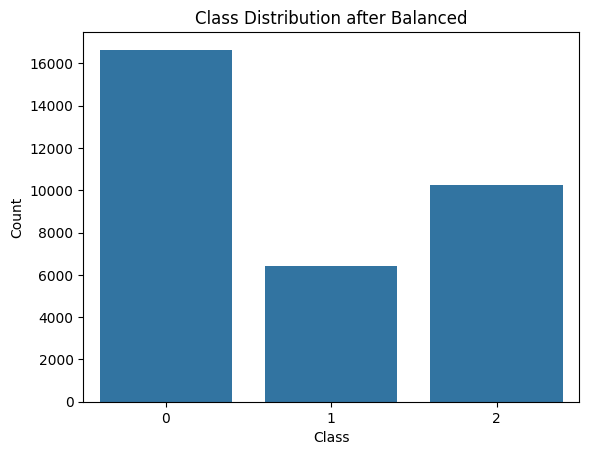

In [75]:
sns.countplot(x=train_balanced['label_id'])
plt.title("Class Distribution after Balanced")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

## **V. Text Length Distribution**

In [76]:
train_balanced['text_length'] = train_balanced['free_text'].apply(lambda x: len(str(x).split()))
dev_set['text_length'] = dev_set['free_text'].apply(lambda x: len(str(x).split()))
test_set['text_length'] = test_set['free_text'].apply(lambda x: len(str(x).split()))

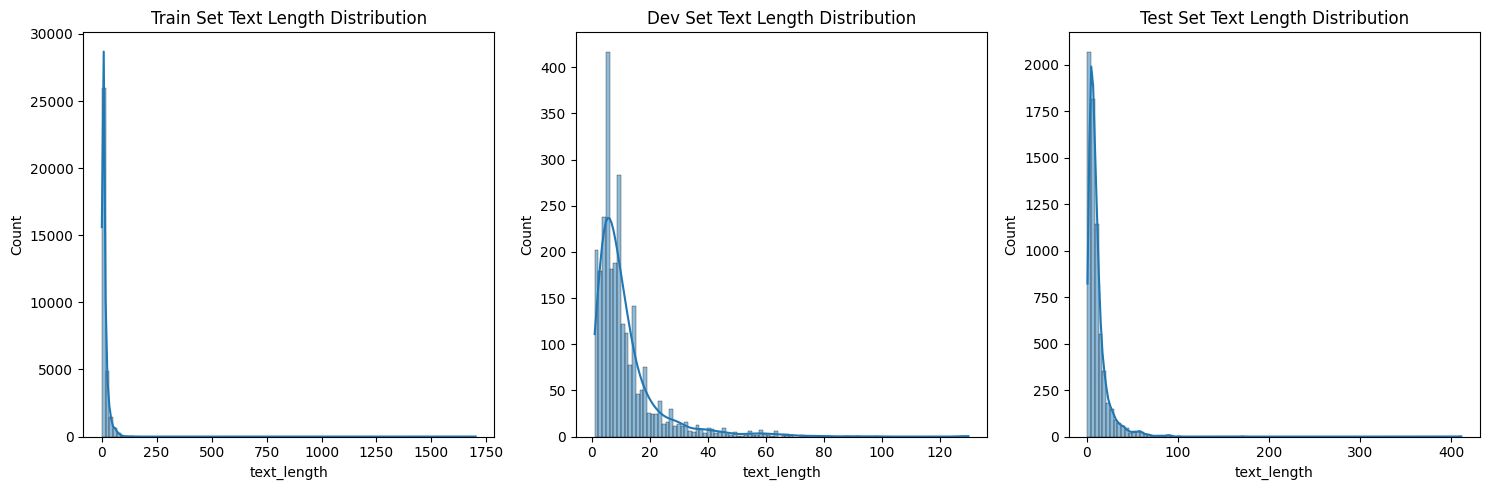

In [77]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(train_balanced['text_length'], bins=100, kde=True)
plt.title('Train Set Text Length Distribution')

plt.subplot(1, 3, 2)
sns.histplot(dev_set['text_length'], bins=100, kde=True)
plt.title('Dev Set Text Length Distribution')

plt.subplot(1, 3, 3)
sns.histplot(test_set['text_length'], bins=100, kde=True)
plt.title('Test Set Text Length Distribution')

plt.tight_layout()
plt.show()


In [83]:
print("Train set:")
print(train_balanced['text_length'].describe())
max_length = int(train_balanced['text_length'].quantile(0.95))
print(f"95th percentile text length: {max_length} words\n")
print("--"*20)

print("Dev set:")
print(dev_set['text_length'].describe())
max_length = int(dev_set['text_length'].quantile(0.95))
print(f"95th percentile text length: {max_length} words\n")
print("--"*20)

print("Test set:")
print(test_set['text_length'].describe())
max_length = int(test_set['text_length'].quantile(0.95))
print(f"95th percentile text length: {max_length} words")

Train set:
count    33288.000000
mean        13.629236
std         19.713702
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max       1701.000000
Name: text_length, dtype: float64
95th percentile text length: 41 words

----------------------------------------
Dev set:
count    2672.000000
mean       11.509356
std        11.709861
min         1.000000
25%         5.000000
50%         8.000000
75%        14.000000
max       130.000000
Name: text_length, dtype: float64
95th percentile text length: 33 words

----------------------------------------
Test set:
count    6680.000000
mean       11.484581
std        12.442907
min         1.000000
25%         5.000000
50%         8.000000
75%        13.000000
max       411.000000
Name: text_length, dtype: float64
95th percentile text length: 33 words


# **B. Preprocessing**

In [90]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)
    text = re.sub(r'\@\w+|\#','', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

In [91]:
train_balanced['cleaned_comment'] = train_balanced['free_text'].apply(clean_text)
dev_set['cleaned_comment'] = dev_set['free_text'].apply(clean_text)
test_set['cleaned_comment'] = test_set['free_text'].apply(clean_text)

In [92]:
train_balanced[['free_text', 'label_id', 'cleaned_comment']]

free_text  label_id  \
0                                          Dkm, chan Vkl         1   
1                Kh·ªï a tao, c√≥ c√°i t√™n su·ªët ng√†y b·ªã l·∫•y.         0   
2           ·ª¶a b·ªØa kh√≥c l√≥c Xin l·ªói r·ªìi gi·ªù ch·ª≠i ti·∫øp h·∫£         0   
3                                           Del h√†i l√≤ng         1   
4                                            ∆† th·∫≠t √†:))         0   
...                                                  ...       ...   
33283                                 Nh√¨n kh√≥ ch·ªãu vch.         1   
33284                                       BenBen Duong         0   
33285            ƒê·∫°t Nguy·ªÖn ch√≥ l√† bn ko ph·∫£i th·ª©c ƒÉn üòÇüòÇ         0   
33286  Thu ƒëi ƒë·ªÉ l·∫°i l√° v√†ng nhunh ƒë·∫øn g·ª≠i ng√†n l·ªùi y...         0   
33287                                  14:45 legend =)))         0   

                                         cleaned_comment  
0                                           dkm chan vkl  
1                  kh·ªï a tao c√≥ c√°i t√™n su·ªët ng√†y b·ªã l·∫•y  
2           ·ªßa b·ªØa kh√≥c l√≥c xin l·ªói r·ªìi gi·ªù ch·ª≠i ti·∫øp h·∫£  
3                                           del h√†i l√≤ng  
4                                               ∆° th·∫≠t √†  
...                                                  ...  
33283                                  nh√¨n kh√≥ ch·ªãu vch  
33284                                       benben duong  
33285               ƒë·∫°t nguy·ªÖn ch√≥ l√† bn ko ph·∫£i th·ª©c ƒÉn  
33286  thu ƒëi ƒë·ªÉ l·∫°i l√° v√†ng nhunh ƒë·∫øn g·ª≠i ng√†n l·ªùi y...  
33287                                        1445 legend  

[33288 rows x 3 columns]

In [93]:
train_balanced[['free_text', 'label_id', 'text_length', 'cleaned_comment']].to_csv("/content/drive/MyDrive/raw/processed_train.csv", index=False)
dev_set.to_csv("/content/drive/MyDrive/raw/processed_dev.csv", index=False)
test_set.to_csv("/content/drive/MyDrive/raw/processed_test.csv", index=False)